In [ ]:
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


cancer = load_breast_cancer()
scaler = MinMaxScaler()

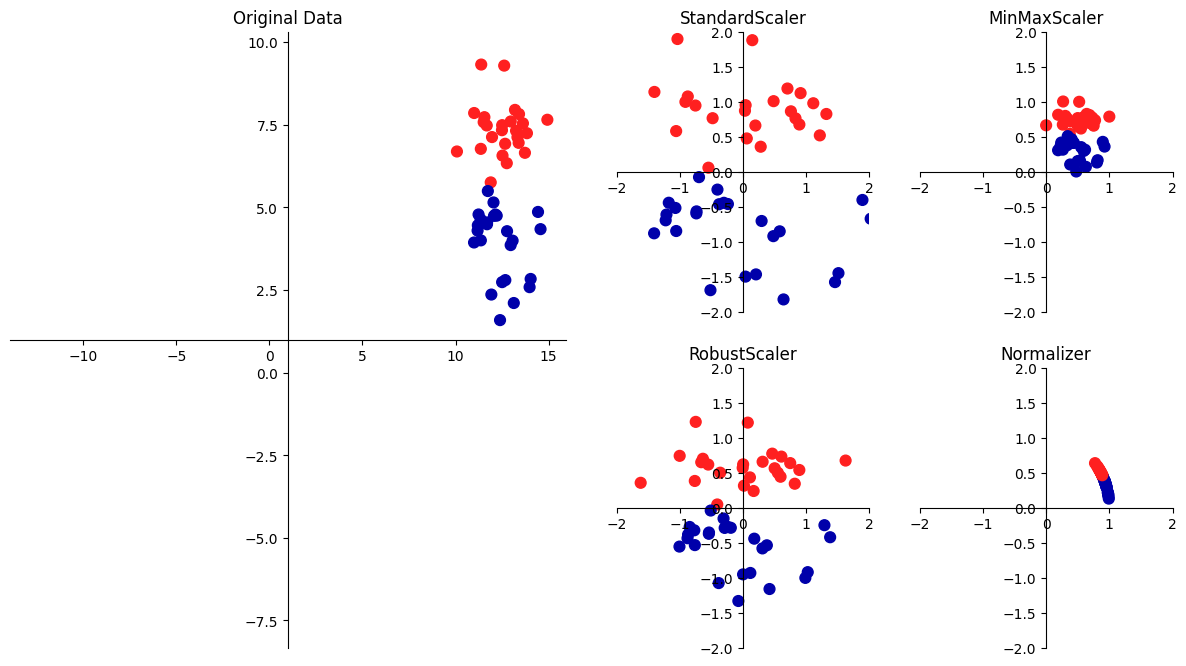

In [9]:
# 3.3. Preprocessing and Scaling

mglearn.plots.plot_scaling()

In [5]:
# 3.3.2. Applying Data Transformations

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [14]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [16]:
X_train_scaled = scaler.transform(X_train)
print(f"Shape after scaling: {X_train_scaled.shape}")
print(f"Minimum per feature before scaling: {X_train.min(axis=0)}")
print(f"Maximum per feature before scaling: {X_train.max(axis=0)}")
print(f"Minimum per feature after scaling: {X_train_scaled.min(axis=0)}")
print(f"Maximum per feature after scaling: {X_train_scaled.max(axis=0)}")


Shape after scaling: (426, 30)
Minimum per feature before scaling: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Maximum per feature before scaling: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
Minimum per feature after scaling: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [17]:
X_test_scaled = scaler.transform(X_test)
print(f"per-feature minimum after scaling:\n{X_test_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n{X_test_scaled.max(axis=0)}")

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_18291/2156001702.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_18291/2156001702.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2(1), label="Test set", 

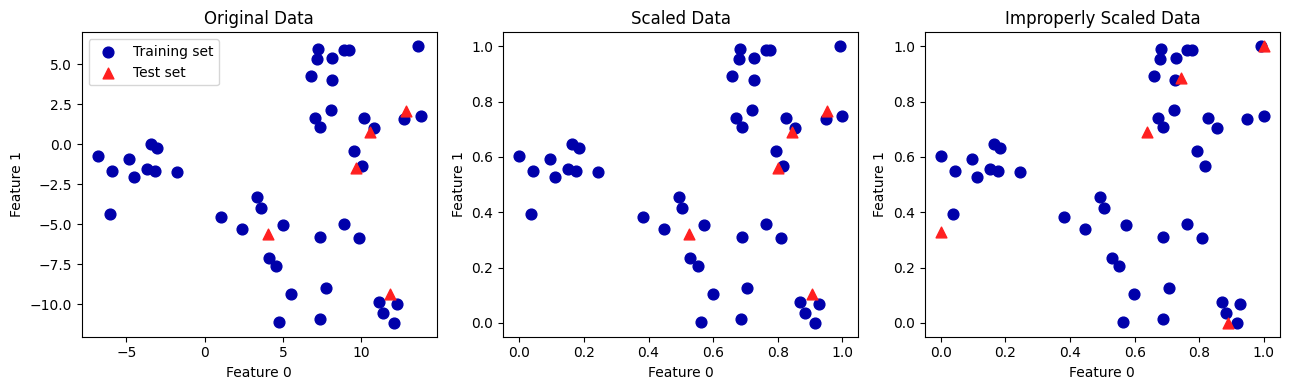

In [32]:
# 3.3.3. Scaling Training and Test Data the Same Way

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2(1), label="Test set", marker='^', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=mglearn.cm2(1), label="Test set", marker='^', s=60)
axes[1].set_title("Scaled Data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly  = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0],  X_test_scaled_badly[:, 1],  c=mglearn.cm2(1), label="Test set", marker='^', s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X)

In [40]:
# 3.3.4. The Effect of Preprocessing on Supervised Learning

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print(f"Test set accuracy: {svm.score(X_test, y_test):.2f}")

Test set accuracy: 0.94


In [41]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(f"Scaled test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Scaled test set accuracy: 0.97


In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(f"Scaled test set accuracy in SVM: {svm.score(X_test_scaled, y_test):.2f}")

Scaled test set accuracy in SVM: 0.96
